In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

#Load dataset
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#Create a 2 layer dense neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

#Create convolutional neural network
#x_train = np.expand_dims(x_train,axis = 3)
#x_test = np.expand_dims(x_test, axis = 3)
#print(x_train.shape)
#print(x_test.shape)

#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (28,28,1)))
#model.add(tf.keras.layers.MaxPooling2D(2,2))
#model.add(tf.keras.layers.Conv2D(4, (3,3), activation = 'relu'))
#model.add(tf.keras.layers.MaxPooling2D(2,2))
#model.add(tf.keras.layers.Conv2D(4, (3,3), activation = 'relu'))
#model.add(tf.keras.layers.MaxPooling2D(2,2))
#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


model.summary()

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 13s 209us/sample - loss: 0.4960 - accuracy: 0.8229 - val_loss: 0.4146 - val_accuracy: 0.8529
Epoch 2/3
60000/60000 [==============================] - 11s 179us/sample - loss: 0.3739 - accuracy: 0.8647 - val_loss: 0.3954 - val_accuracy: 0.8617
Epoch 3/3
60000/60000 [==============================] - 9s 152us/sample - loss: 0.3365 - accuracy: 0.8778 - val_loss: 0.3644 - val_accuracy: 0.8698
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


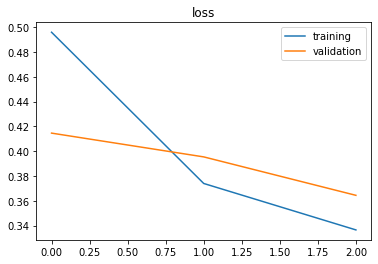

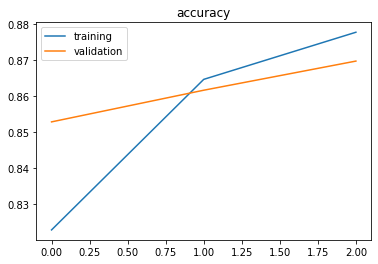

In [2]:
model.compile(
    'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

history = model.fit(
    x_train,
    tf.keras.utils.to_categorical(y_train),
    epochs = 3,
    validation_data = (x_test, tf.keras.utils.to_categorical(y_test)),
)

#Make the validation accuracy and loss plots

print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(loss, label = "training")
plt.plot(val_loss, label = "validation")
plt.title("loss")
plt.legend()
plt.show()

plt.plot(acc, label = "training")
plt.plot(val_acc, label = "validation")
plt.title("accuracy")
plt.legend()
plt.show()

In [3]:
#Evaluate model
model.evaluate(x_test, tf.keras.utils.to_categorical(y_test), verbose = 2)
predictions = model.predict(x_test)

print("predictions")
print(predictions)

probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

print("Done")

10000/1 - 1s - loss: 0.2630 - accuracy: 0.8698
predictions
[[3.5787509e-06 3.6780889e-07 1.9225281e-07 ... 1.5374976e-02
  2.6999585e-06 9.6573454e-01]
 [1.0281360e-05 1.8515345e-09 9.8944271e-01 ... 8.0720750e-11
  6.4266253e-08 7.8764686e-12]
 [7.3010716e-07 9.9999905e-01 2.1001304e-08 ... 1.2724691e-13
  1.3893879e-09 2.8255920e-12]
 ...
 [5.8291592e-03 9.3564222e-07 5.0713001e-03 ... 2.0889638e-06
  9.8092735e-01 3.2319313e-08]
 [4.2828437e-06 9.9994648e-01 8.7068308e-08 ... 1.2064139e-08
  4.2994952e-08 9.1504004e-09]
 [4.7932734e-04 2.2765918e-05 3.7958813e-04 ... 1.8028636e-02
  1.9144005e-03 7.6962623e-04]]
Done


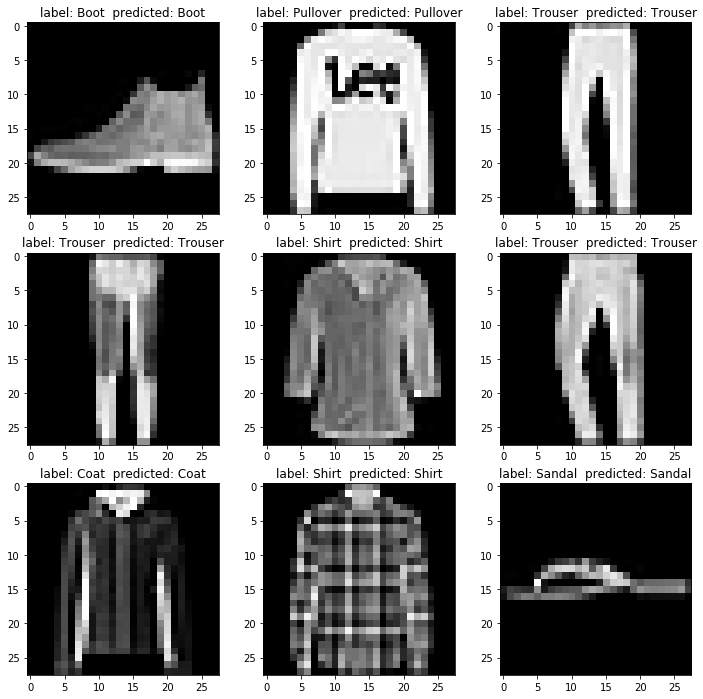

In [4]:
name = ["Tshirt","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]
plt.subplots(3,3,figsize = (12,12))
for i in range(9):
    
    #which prediction is greatest
    predlab = 0
    for j in range(10):
        if(predictions[i][j] > predictions[i][predlab]):
            predlab = j
        
    plt.subplot(330 + 1 + i)
    plt.title("label: " + name[y_test[i]] + "  predicted: " + name[predlab])
    plt.imshow(x_test[i], cmap = plt.get_cmap('gray'))

plt.show()